# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# 2. Collect and load data

In [2]:
df=pd.read_csv('bigcity.csv')
df.head(5)

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3. Explore numeric variables - five number summary

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,49.0,25.000000,14.288690,1.0,13.0,25.0,37.0,49.0
u,49.0,103.142857,104.405061,2.0,43.0,64.0,120.0,507.0
x,49.0,127.795918,123.121211,46.0,58.0,79.0,130.0,634.0


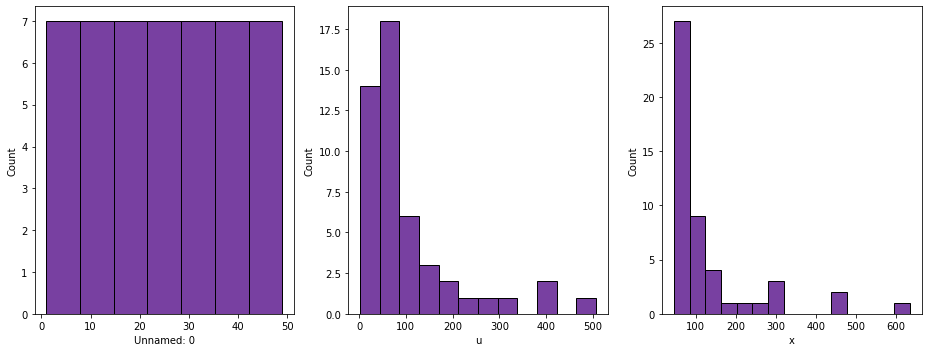

In [4]:
n=1
plt.figure(figsize=(13,5))
for i in df.columns:
    plt.subplot(1,3,n)
    n+=1
    sns.histplot(df[i],color='indigo')
    plt.tight_layout()
plt.show()

In [5]:
print('Variance :',df.var())
print('std :',df.std())

Variance : Unnamed: 0      204.166667
u             10900.416667
x             15158.832483
dtype: float64
std : Unnamed: 0     14.288690
u             104.405061
x             123.121211
dtype: float64


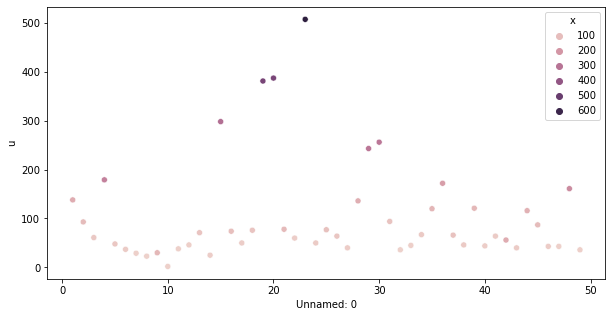

In [6]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Unnamed: 0'],y=df['u'],hue=df['x'])
plt.show()

### Checking for Missing Values

In [7]:
df.isnull().any()

Unnamed: 0    False
u             False
x             False
dtype: bool

In [8]:
df.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

### Splitting the Data

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='x'),df['x'],test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39, 2)
(10, 2)
(39,)
(10,)


***

## Making PipeLine

In [18]:
from sklearn.pipeline import Pipeline
#Category Imputer
from feature_engine.imputation import CategoricalImputer
#Encoding
from sklearn.preprocessing import OrdinalEncoder
#Numerical Imputer
from sklearn.impute import KNNImputer
#Scaling
from sklearn.preprocessing import StandardScaler
#Model
from sklearn.tree import DecisionTreeRegressor


pipe = Pipeline([
    # ('catm', CategoricalImputer('frequent',variables=list(x_train.select_dtypes(include='object').columns))),
    # ('ordi', OrdinalEncoder()),
    ('numm', KNNImputer(n_neighbors=5)),
    ('scale', StandardScaler()),
    ('decisiontree' , DecisionTreeRegressor(random_state=25))
])

In [19]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('numm', KNNImputer()), ('scale', StandardScaler()),
                ('decisiontree', DecisionTreeRegressor(random_state=25))])

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
np.sqrt(mean_squared_error(y_test,pipe.predict(x_test)))

26.343879744638983

In [22]:
pipe.score(x_test,y_test)

0.8961825392195141

## Saving Pipeline

In [23]:
import pickle

In [24]:
file = 'LinearModelPipe.pkl'
pickle.dump(pipe,open(file,'wb'))

## **DeploymentStarts....**

In [33]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
#Category Imputer
from feature_engine.imputation import CategoricalImputer
#Encoding
from sklearn.preprocessing import OrdinalEncoder
#Numerical Imputer
from sklearn.impute import KNNImputer
#Scaling
from sklearn.preprocessing import StandardScaler
#Model
from sklearn.tree import DecisionTreeRegressor
#Importing Pipeline
import pickle

pipe = pickle.load(open('LinearModelPipe.pkl' , 'rb'))

################## Interface building ##################################
st.title('Give the unnamed: 0 col value.')

Unnamed = st.number_input('Unnamed: 0',min_value=0,max_value=100)
u = st.slider('U', min_value=0 , max_value=1000)

input_data = {
    'Unnamed: 0':Unnamed, 
    'u': u
}
input_data = pd.DataFrame([input_data])
st.write(input_data)
prediction = pipe.predict(input_data)

if st.button('Predict'):
    st.success(prediction[0])

Overwriting app.py
